<a href="https://colab.research.google.com/github/Learn-for-a-cause/MachineLearning-workshop/blob/master/Numpy_pandas_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tools - NumPy

NumPy is the fundamental library for scientific computing with Python. NumPy is centered around a powerful N-dimensional array object, and it also contains useful linear algebra, Fourier transform, and random number functions.

_Numpy Cheetsheet : https://www.dataquest.io/blog/numpy-cheat-sheet/_

General Python code for doubling elements in matrix
```python
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
for row in matrix:
  for i in range(len(row)):
      row[i] = row[i] * 2
```
Same functionality with numpy
```python
import numpy as np
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
2 * matrix
```


## Create a NumPy array

In [25]:
import numpy as np
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [0]:
assert matrix[0][1] == 2
assert matrix[0, 1] == 2

In [4]:
np.array([[1, 2, 3], ["a", "b", "c"]])  # NumPy arrays can only hold objects of the same type unlike Pythons lists 

array([['1', '2', '3'],
       ['a', 'b', 'c']], dtype='<U21')

## Array operations

In [5]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 
2 * matrix

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [7]:
second_matrix = np.array([[5, 4, 3], [7, 6, 5], [9, 8, 7]]) 
second_matrix - matrix

array([[ 4,  2,  0],
       [ 3,  1, -1],
       [ 2,  0, -2]])

In [8]:
matrix = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) 
matrix * matrix

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [9]:
matrix @ matrix

array([[3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]])

In [10]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix.shape

(3, 3)

In [11]:
matrix.diagonal()

array([1, 5, 9])

In [12]:
matrix.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
matrix.transpose()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [14]:
matrix.min()

1

In [15]:
matrix.max()

9

In [16]:
matrix.mean()

5.0

In [17]:
matrix.sum()

45

## Stacking and Shaping Arrays

In [18]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[10, 11, 12], [13, 14, 15], [16, 17, 18]])
np.vstack([A, B])

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [19]:
np.hstack([A, B])

array([[ 1,  2,  3, 10, 11, 12],
       [ 4,  5,  6, 13, 14, 15],
       [ 7,  8,  9, 16, 17, 18]])

In [20]:
A.reshape(9, 1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [21]:
A.reshape(2, 5) # re shape size must be equal to number of elements

ValueError: ignored

In [22]:
matrix = np.arange(1, 10)
matrix

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
np.arange(1, 10).reshape(3, 3)

In [0]:
np.arange(1, 13).reshape(3, 2, 2) # easy way to create a high dimentional array

In [23]:
np.arange(1, 24, 2) # stride of 2

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

In [24]:
np.random.random([3, 3])

array([[0.35254108, 0.55731535, 0.14621532],
       [0.96635522, 0.58671608, 0.40258472],
       [0.7463085 , 0.96008401, 0.24673747]])

## What next?
Now you know all the fundamentals of NumPy, but there are many more options available. The best way to learn more is to experiment with NumPy, and go through the excellent [reference documentation](http://docs.scipy.org/doc/numpy/reference/index.html) to find more functions and features you may be interested in.

# Tools - Pandas

**Learning Objectives:**
  * Gain an introduction to the `DataFrame` and `Series` data structures of the *pandas* library
  * Access and manipulate data within a `DataFrame` and `Series`
  * Import CSV data into a *pandas* `DataFrame`
  * Reindex a `DataFrame` to shuffle data

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.



## Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [27]:
from __future__ import print_function

import pandas as pd
pd.__version__

'0.25.3'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

One way to create a `Series` is to construct a `Series` object. For example:

In [65]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [66]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [55]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [56]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee4b0c0208>]],
      dtype=object)

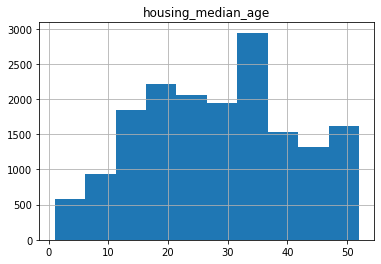

In [57]:
california_housing_dataframe.hist('housing_median_age')

In [58]:
california_housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB


In [0]:
avg_bedrooms_df = pd.DataFrame(data=(california_housing_dataframe['total_rooms'] / california_housing_dataframe['households']), columns=['avg_bedrooms_per_house'])

In [0]:
avg_bedrooms_df = avg_bedrooms_df.apply(np.round)

In [0]:
california_housing_dataframe = pd.concat([california_housing_dataframe, avg_bedrooms_df], axis=1)

In [62]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_bedrooms_per_house
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,12.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,17.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,7.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,6.0


## Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In [67]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [68]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [69]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In addition, *pandas* provides an extremely rich API for advanced [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html) that is too extensive to be covered here.

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [70]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

[NumPy](http://www.numpy.org/) is a popular toolkit for scientific computing. *pandas* `Series` can be used as arguments to most NumPy functions:

In [0]:
import numpy as np

np.log(population)

For more complex single-column transformations, you can use `Series.apply`. Like the Python [map function](https://docs.python.org/2/library/functions.html#map), 
`Series.apply` accepts as an argument a [lambda function](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which is applied to each value.

The example below creates a new `Series` that indicates whether `population` is over one million:

In [0]:
population.apply(lambda val: val > 1000000)


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [0]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

## Exercise #1

Modify the `cities` table by adding a new boolean column that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing *logical and*, use `&` instead of `and`.

**Hint:** "San" in Spanish means "saint."

In [0]:
# Your code here

### Solution

Click below for a solution.

In [0]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

## Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row. 

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [0]:
city_names.index

In [0]:
cities.index

Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [0]:
cities.reindex([2, 0, 1])

Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

In [0]:
cities.reindex(np.random.permutation(cities.index))

For more information, see the [Index documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

## Exercise #2

The `reindex` method allows index values that are not in the original `DataFrame`'s index values. Try it and see what happens if you use such values! Why do you think this is allowed?

In [0]:
# Your code here

### Solution

Click below for the solution.

If your `reindex` input array includes values not in the original `DataFrame` index values, `reindex` will add new rows for these "missing" indices and populate all corresponding columns with `NaN` values:

In [0]:
cities.reindex([0, 4, 5, 2])

This behavior is desirable because indexes are often strings pulled from the actual data (see the [*pandas* reindex
documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html) for an example
in which the index values are browser names).

In this case, allowing "missing" indices makes it easy to reindex using an external list, as you don't have to worry about
sanitizing the input.

# Tools - Matplotlib